In [33]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

from imblearn.over_sampling import SMOTE

In [5]:
data= pd.read_csv('LoanStats3a.csv', encoding='latin-1', low_memory=False)
print(data.shape)
data.head()

(42537, 56)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599.0,5000.0,5000.0,4975.0,36 months,10.65%,162.87,B,B2,...,Jul-16,0.0,NaN,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
1,1077430,1314167.0,2500.0,2500.0,2500.0,60 months,15.27%,59.83,C,C4,...,Sep-13,0.0,NaN,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
2,1077175,1313524.0,2400.0,2400.0,2400.0,36 months,15.96%,84.33,C,C5,...,Jul-16,0.0,NaN,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
3,1076863,1277178.0,10000.0,10000.0,10000.0,36 months,13.49%,339.31,C,C1,...,Apr-16,0.0,NaN,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
4,1075358,1311748.0,3000.0,3000.0,3000.0,60 months,12.69%,67.79,B,B5,...,Jul-16,0.0,NaN,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0


In [6]:
print("\nData Types of each column:\n", data.dtypes)


Data Types of each column:
 id                              object
member_id                      float64
loan_amnt                      float64
funded_amnt                    float64
funded_amnt_inv                float64
term                            object
int_rate                        object
installment                    float64
grade                           object
sub_grade                       object
emp_title                       object
emp_length                      object
home_ownership                  object
annual_inc                     float64
verification_status             object
issue_d                         object
loan_status                     object
pymnt_plan                      object
purpose                         object
title                           object
zip_code                        object
addr_state                      object
dti                            float64
delinq_2yrs                    float64
earliest_cr_line                obj

In [7]:
# Check for missing values
data['pub_rec_bankruptcies'] = data['pub_rec_bankruptcies'].fillna(0)
print(data.isnull().sum())

id                                 1
member_id                          2
loan_amnt                          2
funded_amnt                        2
funded_amnt_inv                    2
term                               2
int_rate                           2
installment                        2
grade                              2
sub_grade                          2
emp_title                       2628
emp_length                      1114
home_ownership                     2
annual_inc                         6
verification_status                2
issue_d                            2
loan_status                        2
pymnt_plan                         2
purpose                            2
title                             15
zip_code                           2
addr_state                         2
dti                                2
delinq_2yrs                       31
earliest_cr_line                  31
inq_last_6mths                    31
mths_since_last_delinq         26928
m

In [8]:
data=data.drop(columns=['id', 'member_id','mths_since_last_delinq', 'emp_title','emp_length','mths_since_last_record','next_pymnt_d','mths_since_last_major_derog', 'issue_d', 'pymnt_plan', 'zip_code','tax_liens','acc_now_delinq','delinq_amnt','pub_rec_bankruptcies'],axis=1)

In [9]:
data = data.dropna()
data.isnull().sum()

,0
loan_amnt,0
funded_amnt,0
funded_amnt_inv,0
term,0
int_rate,0
installment,0
grade,0
sub_grade,0
home_ownership,0
annual_inc,0


In [10]:
try:
    data['int_rate'] = data['int_rate'].str.rstrip('%').astype(float) / 100
    data['term'] = data['term'].str.extract('(\d+)').astype(int)
    data['revol_util'] = data['revol_util'].str.rstrip('%').astype(float) / 100
except Exception as e:
    print("already an int:", e)

data.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,...,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,chargeoff_within_12_mths
0,5000.0,5000.0,4975.0,36,0.1065,162.87,B,B2,RENT,24000.0,...,0.00,0.00,0.00,Jan-15,171.62,Jul-16,0.0,1.0,INDIVIDUAL,0.0
1,2500.0,2500.0,2500.0,60,0.1527,59.83,C,C4,RENT,30000.0,...,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0,1.0,INDIVIDUAL,0.0
2,2400.0,2400.0,2400.0,36,0.1596,84.33,C,C5,RENT,12252.0,...,0.00,0.00,0.00,Jun-14,649.91,Jul-16,0.0,1.0,INDIVIDUAL,0.0
3,10000.0,10000.0,10000.0,36,0.1349,339.31,C,C1,RENT,49200.0,...,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0,1.0,INDIVIDUAL,0.0
4,3000.0,3000.0,3000.0,60,0.1269,67.79,B,B5,RENT,80000.0,...,0.00,0.00,0.00,Aug-16,67.79,Jul-16,0.0,1.0,INDIVIDUAL,0.0


In [11]:
# Check for duplicate rows
duplicates = data[data.duplicated()]
num_duplicates = len(duplicates)
print(f"Number of duplicate rows: {num_duplicates}")

# Remove duplicate rows
df = data.drop_duplicates()
print("Shape of dataset including duplicates",data.shape)
print("Shape of dataset after removing duplicates",df.shape)

Number of duplicate rows: 0
Shape of dataset including duplicates (42238, 41)
Shape of dataset after removing duplicates (42238, 41)


In [12]:
for col in data.columns:
    if len(data[col].value_counts()) == 1:
        print(f"Dropping column '{col}' as it has only one unique value.")
        data = data.drop(col, axis=1)
data.head()

Dropping column 'initial_list_status' as it has only one unique value.
Dropping column 'collections_12_mths_ex_med' as it has only one unique value.
Dropping column 'policy_code' as it has only one unique value.
Dropping column 'application_type' as it has only one unique value.
Dropping column 'chargeoff_within_12_mths' as it has only one unique value.


,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,...,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d
0,5000.0,5000.0,4975.0,36,0.1065,162.87,B,B2,RENT,24000.0,...,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,Jul-16
1,2500.0,2500.0,2500.0,60,0.1527,59.83,C,C4,RENT,30000.0,...,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13
2,2400.0,2400.0,2400.0,36,0.1596,84.33,C,C5,RENT,12252.0,...,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,Jul-16
3,10000.0,10000.0,10000.0,36,0.1349,339.31,C,C1,RENT,49200.0,...,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16
4,3000.0,3000.0,3000.0,60,0.1269,67.79,B,B5,RENT,80000.0,...,3716.700000,3716.70,2664.90,1051.80,0.00,0.00,0.00,Aug-16,67.79,Jul-16


In [13]:
data['loan_status'].value_counts()

,count
loan_status,
Fully Paid,33220
Charged Off,5548
Does not meet the credit policy. Status:Fully Paid,1913
Current,781
Does not meet the credit policy. Status:Charged Off,725
In Grace Period,22
Late (31-120 days),17
Late (16-30 days),8
Default,4


In [14]:
data['loan_status'] = data['loan_status'].replace('Does not meet the credit policy. Status:Fully Paid', 'Fully Paid')
data['loan_status'] = data['loan_status'].replace('Does not meet the credit policy. Status:Charged Off', 'Charged Off')
data['loan_status'].value_counts()

,count
loan_status,
Fully Paid,35133
Charged Off,6273
Current,781
In Grace Period,22
Late (31-120 days),17
Late (16-30 days),8
Default,4


In [15]:
data = data[data['loan_status'].isin(['Fully Paid', 'Charged Off'])].copy()
data['target'] = data['loan_status'].map({'Fully Paid': 0, 'Charged Off': 1})
data['target'].value_counts()

,count
target,
0,35133
1,6273


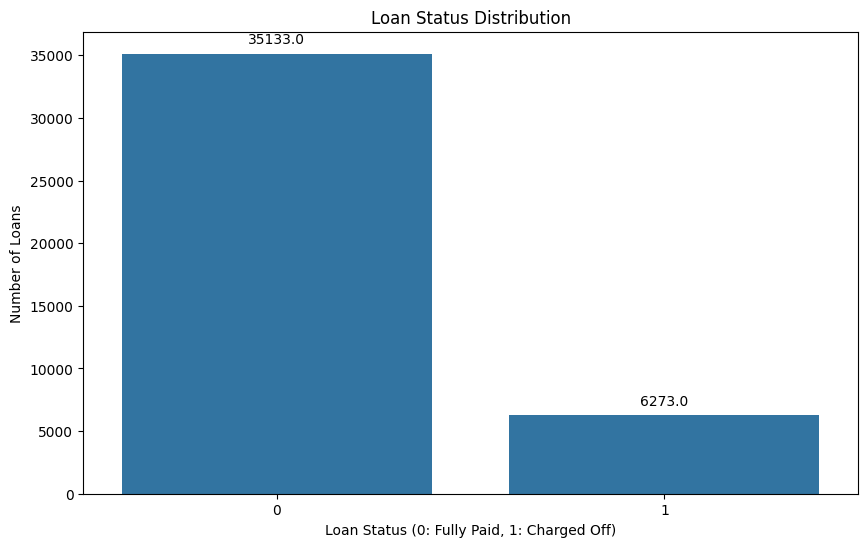

In [16]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sns.countplot(x='target', data=data)
plt.title('Loan Status Distribution')
plt.xlabel('Loan Status (0: Fully Paid, 1: Charged Off)')
plt.ylabel('Number of Loans')

# Print the values
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.show()


In [17]:
data.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'home_ownership', 'annual_inc',
       'verification_status', 'loan_status', 'purpose', 'title', 'addr_state',
       'dti', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'last_credit_pull_d', 'target'],
      dtype='object')

In [18]:
for c in data.columns:
  print("\n\n\n{c} column\n".format(c=c))
  print(data[c].value_counts())




loan_amnt column

loan_amnt
10000.0    2985
12000.0    2375
5000.0     2203
6000.0     2018
15000.0    1968
           ... 
12275.0       1
3475.0        1
21425.0       1
850.0         1
20425.0       1
Name: count, Length: 883, dtype: int64



funded_amnt column

funded_amnt
10000.0    2895
12000.0    2286
5000.0     2190
6000.0     2004
15000.0    1855
           ... 
24275.0       1
925.0         1
550.0         1
24100.0       1
850.0         1
Name: count, Length: 1033, dtype: int64



funded_amnt_inv column

funded_amnt_inv
5000.000000     1357
10000.000000    1291
6000.000000     1232
12000.000000    1049
8000.000000      918
                ... 
19091.849530       1
24724.537010       1
13141.015990       1
7074.953421        1
7592.780013        1
Name: count, Length: 9106, dtype: int64



term column

term
36    31262
60    10144
Name: count, dtype: int64



int_rate column

int_rate
0.1099    953
0.1149    813
0.0751    786
0.1349    775
0.0788    742
         ... 
0.214

In [19]:
data=data.drop(columns=['grade','sub_grade','title','addr_state','earliest_cr_line','out_prncp_inv','out_prncp','loan_status','last_credit_pull_d','last_pymnt_d','purpose'],axis=1)

In [24]:
print(data.shape)
dummies = pd.get_dummies(data[['home_ownership', 'verification_status']])

# Convert all dummy columns to int
dummies = dummies.astype(int)
dummies.head()

(41406, 26)


,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified
0,0,0,0,0,1,0,0,1
1,0,0,0,0,1,0,1,0
2,0,0,0,0,1,1,0,0
3,0,0,0,0,1,0,1,0
5,0,0,0,0,1,0,1,0


In [26]:
df = data.drop(['home_ownership', 'verification_status'], axis=1)

# Add dummy columns
df = pd.concat([df, dummies], axis=1)
print(df.shape)
df.head()

(41406, 32)


,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,last_pymnt_amnt,target,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified
0,5000.0,5000.0,4975.0,36,0.1065,162.87,24000.0,27.65,0.0,1.0,...,171.62,0,0,0,0,0,1,0,0,1
1,2500.0,2500.0,2500.0,60,0.1527,59.83,30000.0,1.00,0.0,5.0,...,119.66,1,0,0,0,0,1,0,1,0
2,2400.0,2400.0,2400.0,36,0.1596,84.33,12252.0,8.72,0.0,2.0,...,649.91,0,0,0,0,0,1,1,0,0
3,10000.0,10000.0,10000.0,36,0.1349,339.31,49200.0,20.00,0.0,1.0,...,357.48,0,0,0,0,0,1,0,1,0
5,5000.0,5000.0,5000.0,36,0.0790,156.46,36000.0,11.20,0.0,3.0,...,161.03,0,0,0,0,0,1,0,1,0


In [27]:
print("\nData Types of each column:\n", df.dtypes)


Data Types of each column:
 loan_amnt                              float64
funded_amnt                            float64
funded_amnt_inv                        float64
term                                     int64
int_rate                               float64
installment                            float64
annual_inc                             float64
dti                                    float64
delinq_2yrs                            float64
inq_last_6mths                         float64
open_acc                               float64
pub_rec                                float64
revol_bal                              float64
revol_util                             float64
total_acc                              float64
total_pymnt                            float64
total_pymnt_inv                        float64
total_rec_prncp                        float64
total_rec_int                          float64
total_rec_late_fee                     float64
recoveries                     

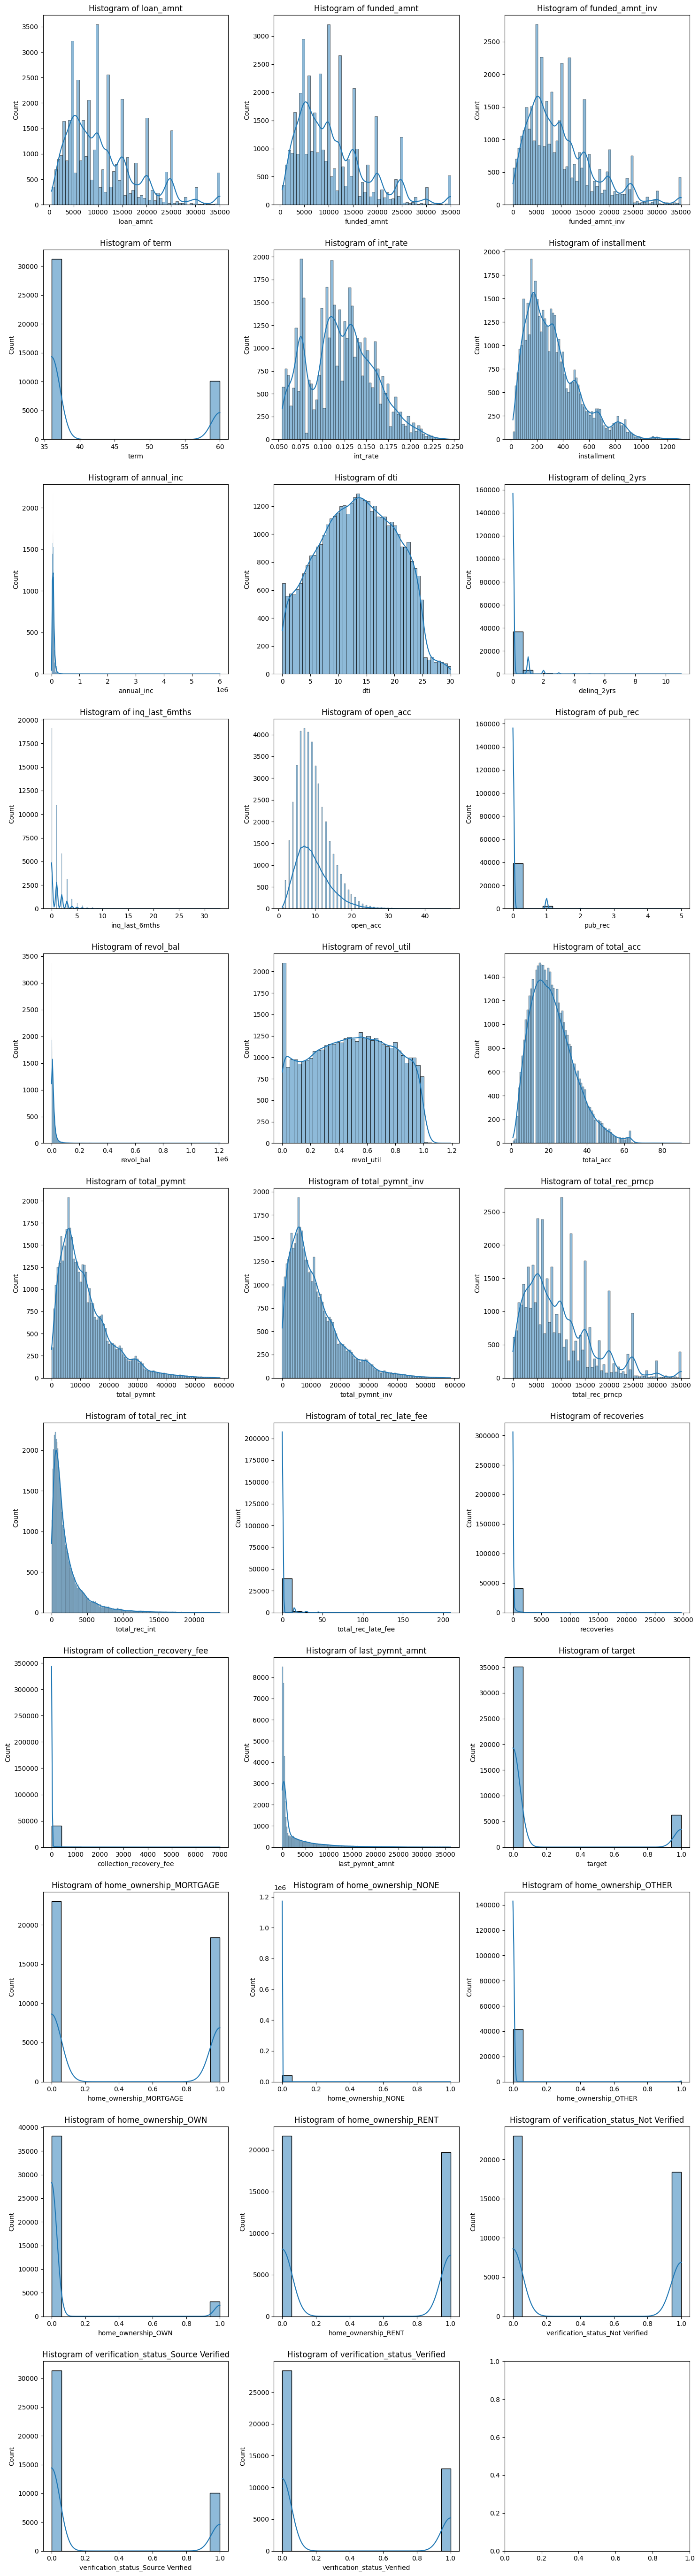

In [30]:

numeric_cols = df.select_dtypes(include=np.number).columns

# Plot histograms for numeric columns in 3 columns
num_plots = len(numeric_cols)
num_cols = 3
num_rows = (num_plots + num_cols - 1) // num_cols

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))
axes = axes.flatten()  # Flatten the axes array for easier iteration

for i, col in enumerate(numeric_cols):
    if i < num_plots:
        sns.histplot(df[col].dropna(), kde=True, ax=axes[i]) # Drop NaN values before plotting
        axes[i].set_title(f'Histogram of {col}')
    else:
        axes[i].axis('off')  # Hide any extra subplots

plt.tight_layout()
plt.show()


Descriptive Statistics for Numerical Features:
           loan_amnt   funded_amnt  funded_amnt_inv          term  \
count  41406.000000  41406.000000     41406.000000  41406.000000   
mean   10991.309834  10726.992465     10050.180448     41.879728   
std     7325.487006   7065.643260      7034.351783     10.322056   
min      500.000000    500.000000         0.000000     36.000000   
25%     5100.000000   5000.000000      4950.000000     36.000000   
50%     9600.000000   9450.000000      8400.000000     36.000000   
75%    15000.000000  15000.000000     13997.926857     36.000000   
max    35000.000000  35000.000000     35000.000000     60.000000   

           int_rate   installment    annual_inc           dti   delinq_2yrs  \
count  41406.000000  41406.000000  4.140600e+04  41406.000000  41406.000000   
mean       0.121006    321.676793  6.903032e+04     13.365444      0.152007   
std        0.036872    208.570683  6.439693e+04      6.720208      0.507813   
min        0.054200    

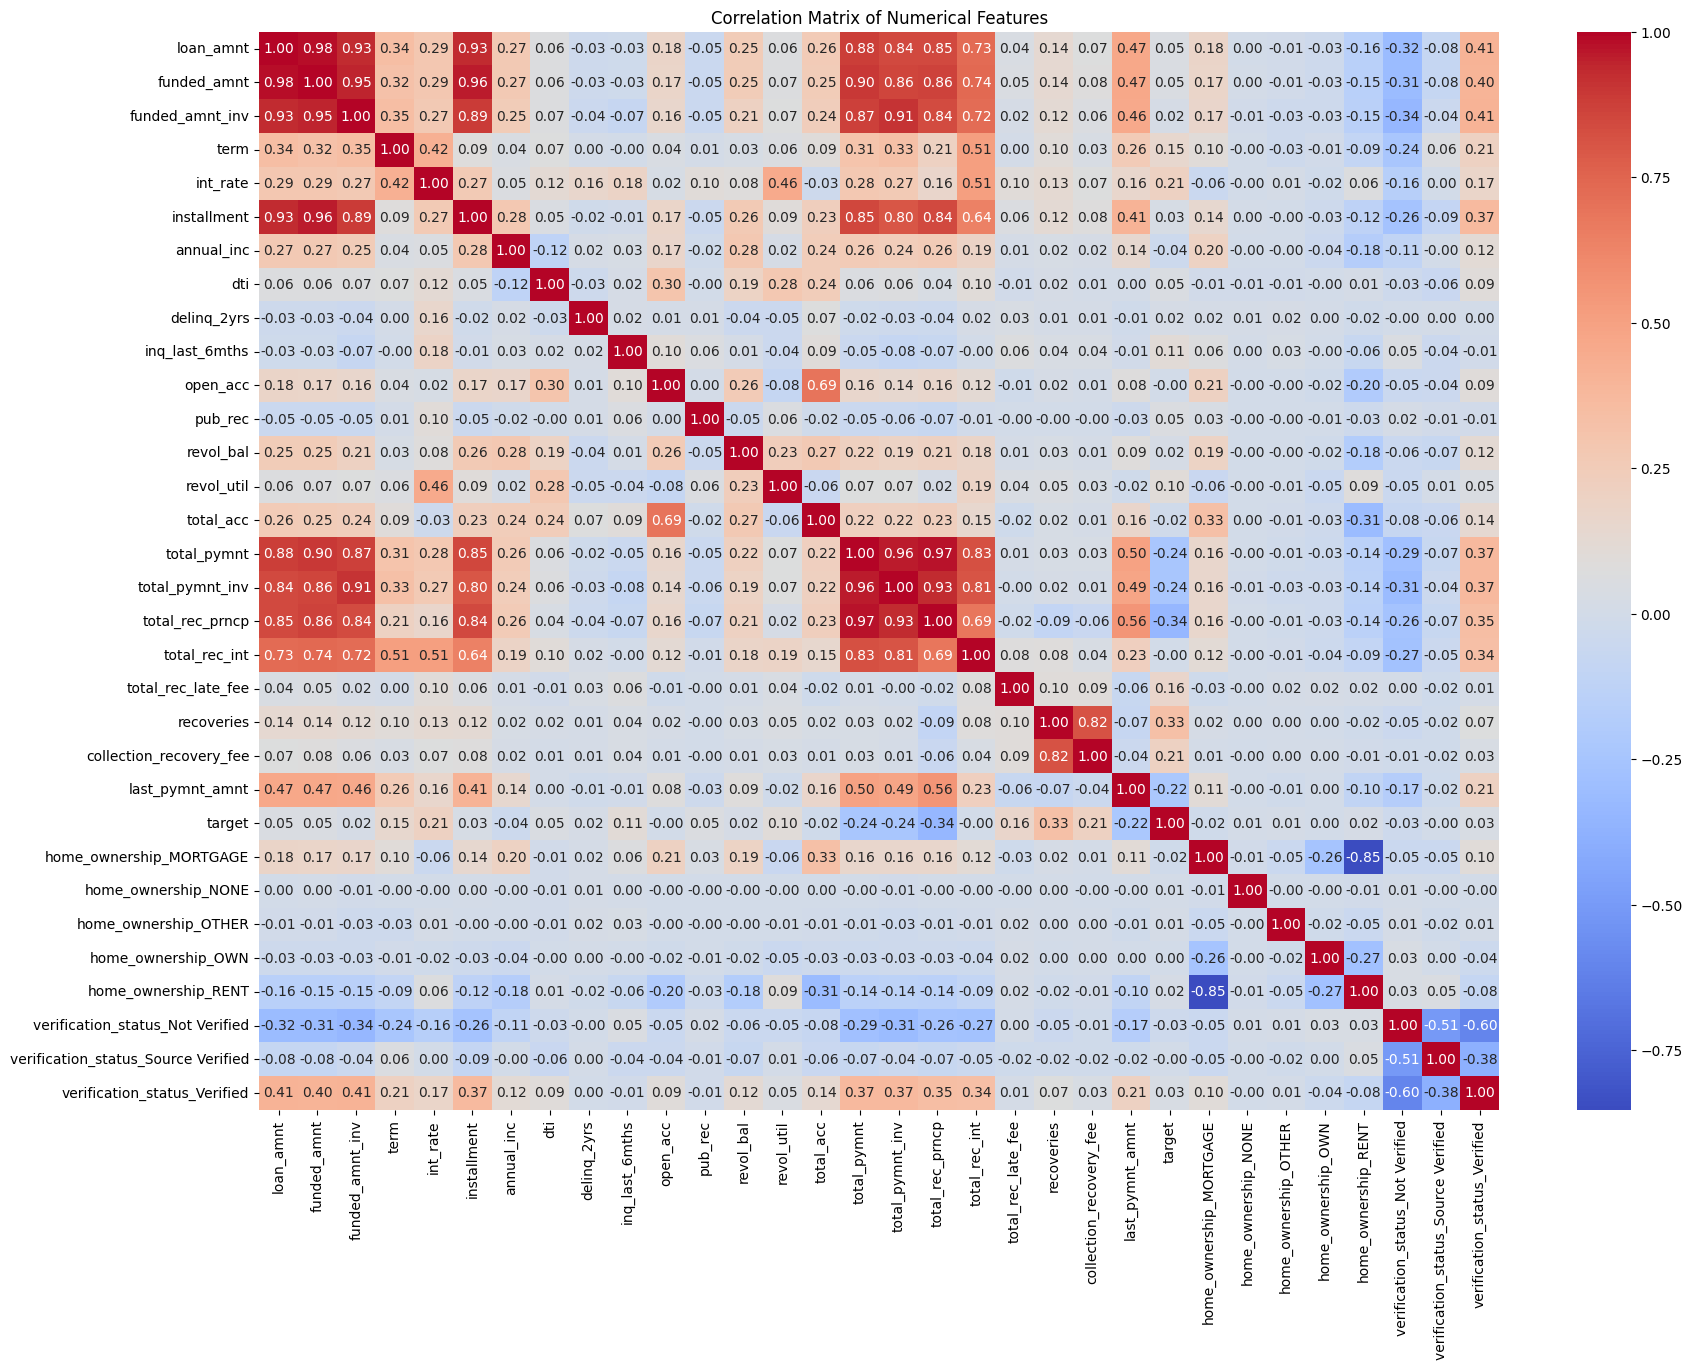

In [31]:
numerical_cols = df.select_dtypes(include=['number']).columns
descriptive_stats = df[numerical_cols].describe()
print("Descriptive Statistics for Numerical Features:\n", descriptive_stats)

correlation_matrix = df[numerical_cols].corr()
plt.figure(figsize=(20, 14))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

In [32]:
X=df.drop('target',axis=1)
y=df['target']

In [34]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Initialize and train the Logistic Regression model
logreg_model = LogisticRegression(max_iter=1000)  # Increased max_iter
logreg_model.fit(X_train, y_train)
logreg_pred = logreg_model.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, logreg_pred))
print(classification_report(y_test, logreg_pred))

# Initialize and train the Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
print("\nRandom Forest Accuracy:", accuracy_score(y_test, rf_pred))
print(classification_report(y_test, rf_pred))

# Initialize and train the XGBoost model
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)
print("\nXGBoost Accuracy:", accuracy_score(y_test, xgb_pred))
print(classification_report(y_test, xgb_pred))


Logistic Regression Accuracy: 0.9998792562183048
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7072
           1       1.00      1.00      1.00      1210

    accuracy                           1.00      8282
   macro avg       1.00      1.00      1.00      8282
weighted avg       1.00      1.00      1.00      8282


Random Forest Accuracy: 0.9952909925138855
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      7072
           1       1.00      0.97      0.98      1210

    accuracy                           1.00      8282
   macro avg       1.00      0.98      0.99      8282
weighted avg       1.00      1.00      1.00      8282


XGBoost Accuracy: 0.9972228930210094
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7072
           1       1.00      0.98      0.99      1210

    accuracy                           1.00      82